# INTRODUCTION TO GRAPHICS IN R
Traditional graphics system in R is very flexible.
Has (**1**) collection of high-level plotting functions 
to produce entire coherent displays, and 
(**2**) several low level functions to enhance those 
displays and to provide finer control over the
various elements that make them up; and
(**3**) a system of parameters that enable global 
control over defaults and other details.

But Base Graphics are not real good at:
(**1**) Combining multiple plots on a page
with properly coordinated scales, aspect ratios,
and labels which are difficult tasks, especially
in combination. "Trellis graphics", implemented
in the S language, was designed to address this
shortcoming. The "lattice" package in R provides
similar capabilities.

The name "Trellis" comes from the trellislike
rectangular array of 'panels' often comprising
such displays.

Trellis displays particularly strong for:
(**1**) choosing multiple default values for optional
graphing argument values; and
(**2**) a better substitute to the base package for
traditional statistical graphs.

Are similarities: (**1**) Both provide high-level
functions to produce comprehensive statistical
graphs; (**2**) Both provide fine control over
annotation and tools to augment displays; and
(**3**) Both use a system of user-modifiable global
parameters that control display details.

##  MULTIPANEL CONDITIONING
Use data on 1997 A-level chemistry examination in Great Britain. Data are available in the
mimRev package, can be loaded with data() function:

In [1]:
data(Chem97, package = "mlmRev")

Test scores of 31,022 students, shows gender, age
and average GCSE score.

We are going to look at visualizations of the
distributions of one continuous univariate measure,
the average GCSE score.

Want to know the extent to which this measure can
can be used to predict the A-level chemistry
examination score (which is a discrete grade with
possible values 0, 2, 4, 6 and 8)

Run cross-tabulate function of data:

In [2]:
xtabs( ~ score, data = Chem97)
library("lattice")

score
   0    2    4    6    8   10 
3688 3627 4619 5739 6668 6681 

## A HISTOGRAM FOR EVERY GROUP

Answer question with a different question :
Is the distribution of gcsescore different for 
different values of the (achieved) score?

**Histogram** summarizes univariate distributions.


This call places them all on same page:

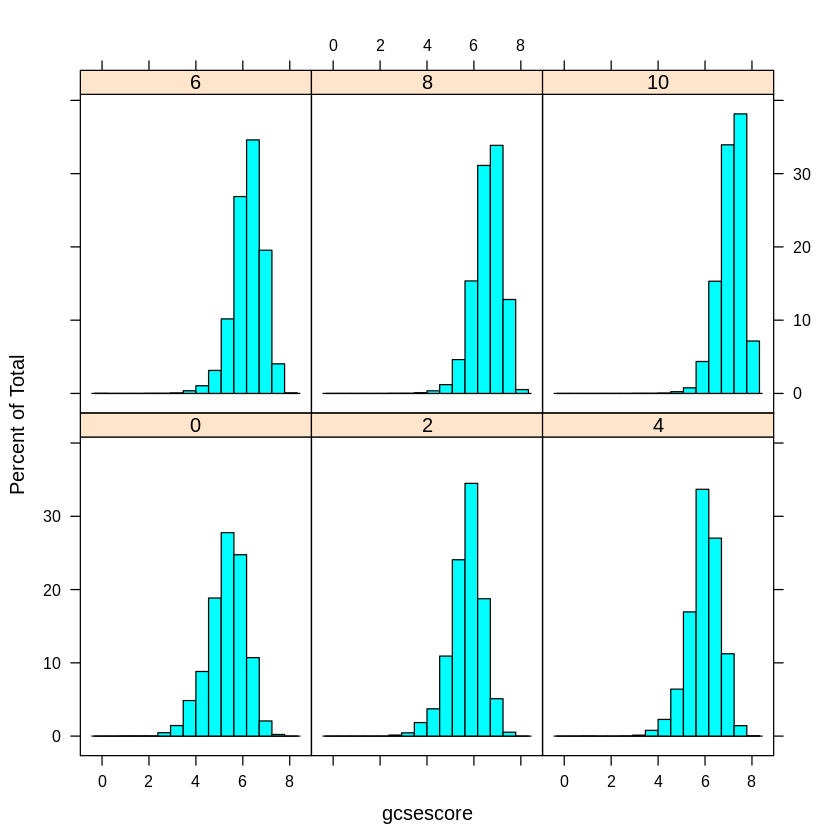

In [3]:
histogram(~ gcsescore | factor(score), data = Chem97)

Each histogram represented by a "panel". Six
panels laid out in an "array" with dimensions
determined automatically. All panels have same
scales, so easy to compare.

Axes annotated with tic marks and labels only at
boundaries, saves space between panels.

A "strip" at top of each panel describes which
value of "score" that panel represents.

These features are available in all Trellis
displays and are known as "multipanel conditioning".

## TRELLIS HISTOGRAM CALL

**histogram()** function creates histograms.

Call above uses two arguments: (**1**) **first** (unnamed)
argument, '**x**', is a "**formula**" object that specifies
the variables involved in the plot: and (**2**) **second**
argument, '**data**', is data frame containing the
variables references in formula x.

In formula **~ gcsescore | factor(score)**, part after
vertical bar is 'conditioning variable' indicating
that plot should contain one value for each of its
unique values (levels).

Inline conversion to factor relates to how value
of conditioning variable is displayed. Do this:

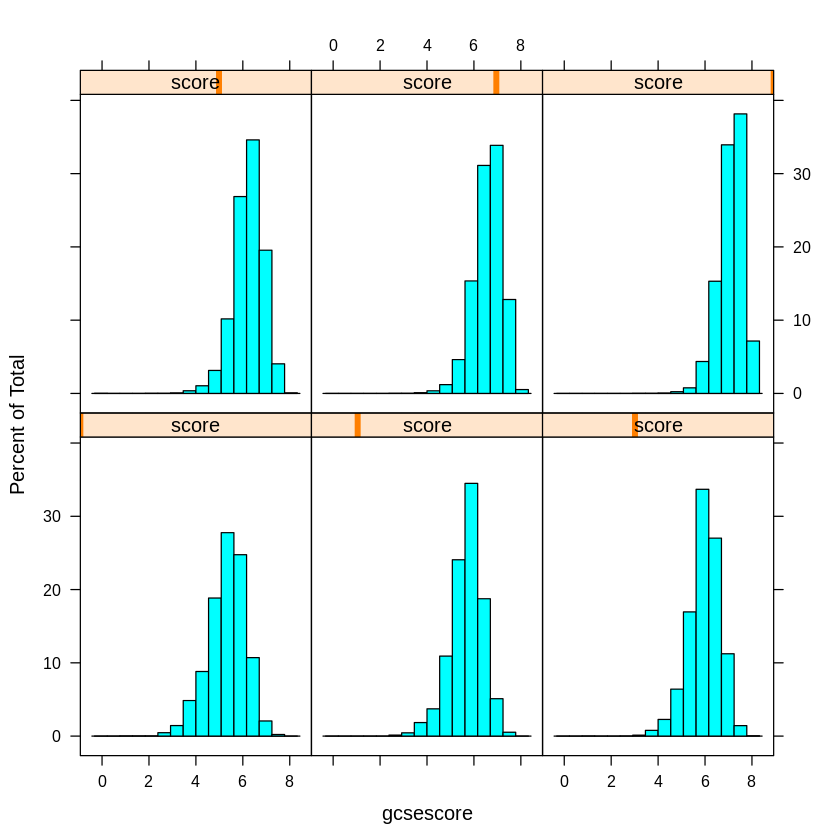

In [4]:
histogram(~ gcsescore | score, data = Chem97)

Part of formula to left of bar specifies "primary
variable" that goes inside each panel.

## KERNEL DENSITY PLOTS

Histograms are crude example of more general class
of univariate data summaries, "density estimates".

**densityplot()** is high-level lattice function that
plots kernel density estimates:

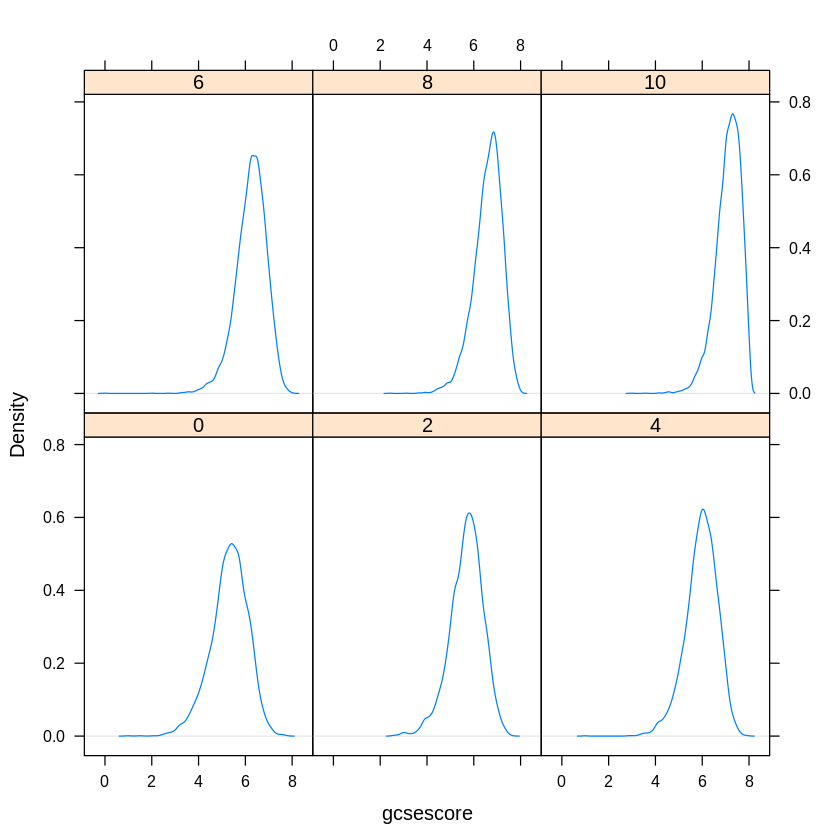

In [5]:
densityplot(~ gcsescore | factor(score), data = Chem97, 
            plot.points = FALSE, ref = TRUE)

Have two more arguments: (**1**) 'ref' adds a "reference
line" at 0; and (**2**) 'plot points' controls whether
original points are plotted (useful for small data)

Are really arguments of default 'panel function'.

## SUPERPOSITION

Grouped density plots:

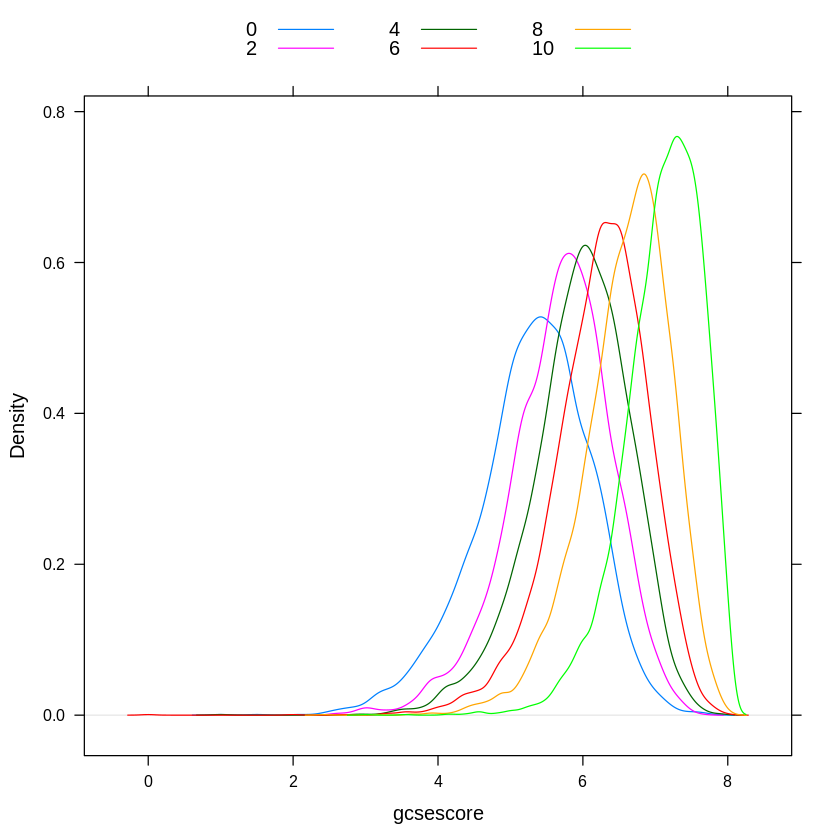

In [6]:
densityplot(~ gcsescore, data = Chem97, groups = score,
            plot.points = FALSE, ref = TRUE,
            auto.key = list(columns = 3))

We superimpose previous plots in one panel, forcing
a direct comparison. We use (**1**) no conditioning
factor; and (**2**) an 'auto.key' (legend format).

We use score as a '**grouping variable**' instead of a 
as a conditioning variable.

auto.key argument automatically adds a suitable
legend to plot.

Note that abstraction is used in specifying structure
of plot through the '**type**' of graphic (histogram,
density plot) and the 'role' of variables (primary
display, conditioning, superposition). This abstrac-
tion is fundamental in the lattice paradigm.

## THE TRELLIS OBJECT

Most regular R functions do not produce any output
themselves. Instead, they return an '**object**' that
can be assigned to a variable, used in arguments
to other functions, and generally manipulated in
various ways.

Every such object has a '**class**' that determines
the behavior of functions that act of them. An
important one is the generic function '**print()**'
which displays an object in a suitable manner.

Normally, '**print()**' does not have to explicitly
invoked. An expression evaluated, but not
assigned to a variable, at top level is printed
automatically.

However, traditional graphics functions are an
exception to this paradigm as they generally
do not return any useful object, they are invoked
for their '**side-effect**' of drawing on a graphics
device.

High level functions in lattice differ from this
overall R paradigm. They do not draw anything
themselves. Instead, they return an object of
class "**trellis**" and do create an actual graphic
when trellis objects are printed by print method.

However, this difference can be mostly ignorred
and lattice functions substituted for their
traditional counterparts because print() is
usually invoked automatically:

In [7]:
tp1 <- histogram(~ gcsescore | factor(score), 
                 data = Chem97)
tp2 <- densityplot(~ gcsescore, data = Chem97, 
                   groups = score,
                   plot.points = FALSE,
                   auto.key = list(space = "right", 
                                   title = "score"))
class(tp2)
summary(tp1)

[1] "trellis"


Call:
histogram(~gcsescore | factor(score), data = Chem97)

Number of observations:
factor(score)
   0    2    4    6    8   10 
3688 3627 4619 5739 6668 6681 

Plots can also be drawn using print():

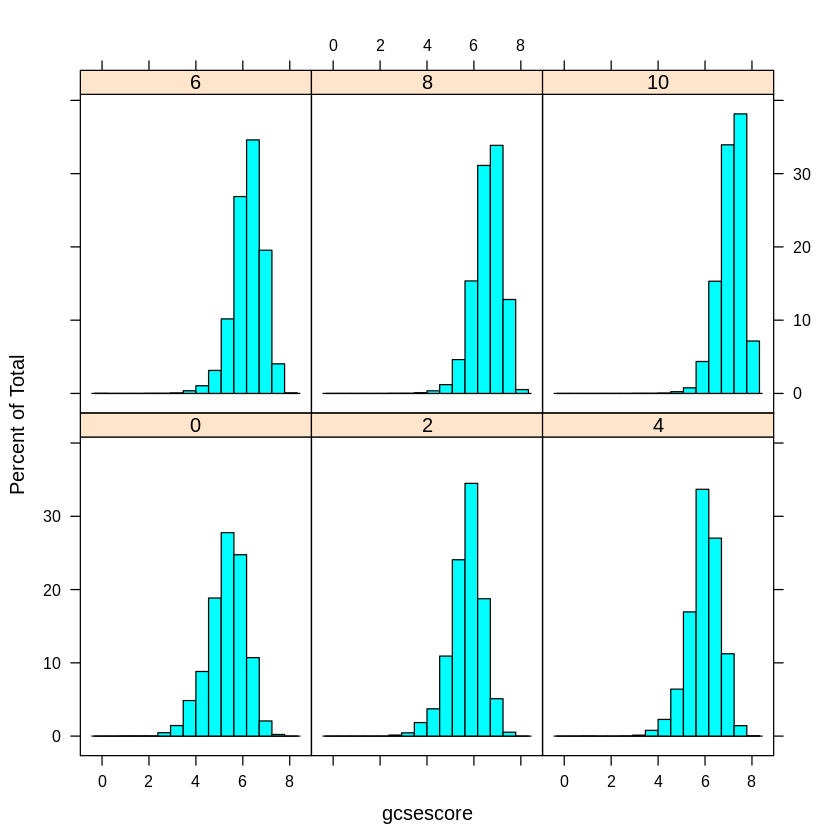

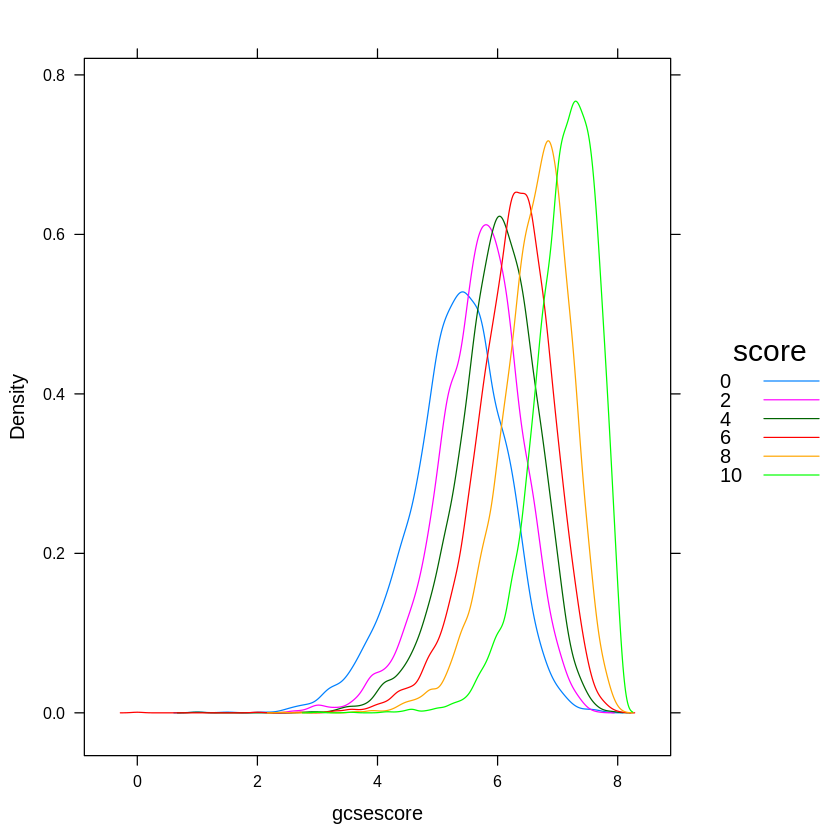

In [8]:
print(tp1)
print(tp2)

or using plot()

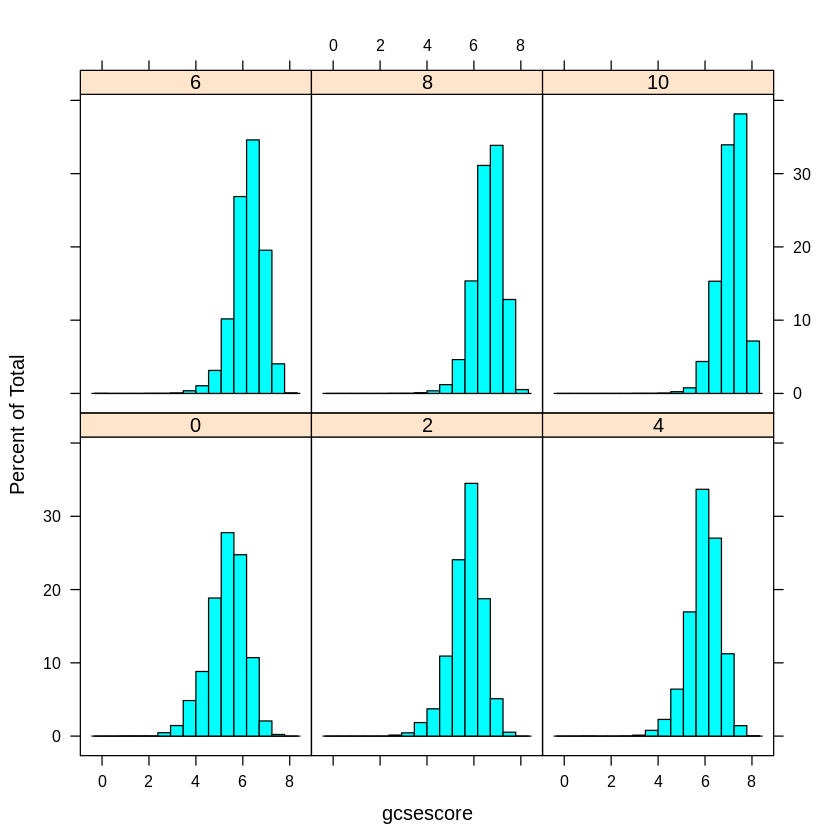

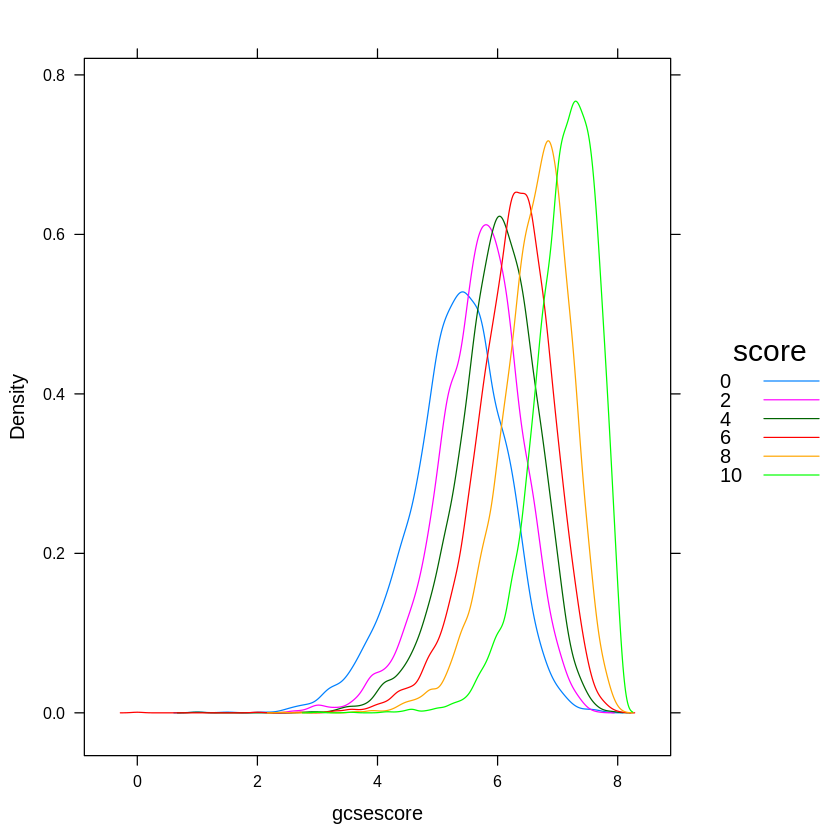

In [9]:
plot(tp1)
plot(tp2)

## LOOKING AHEAD

Lattice functions histogram() and densityplot() each
produce a particular type of statistical graphic:

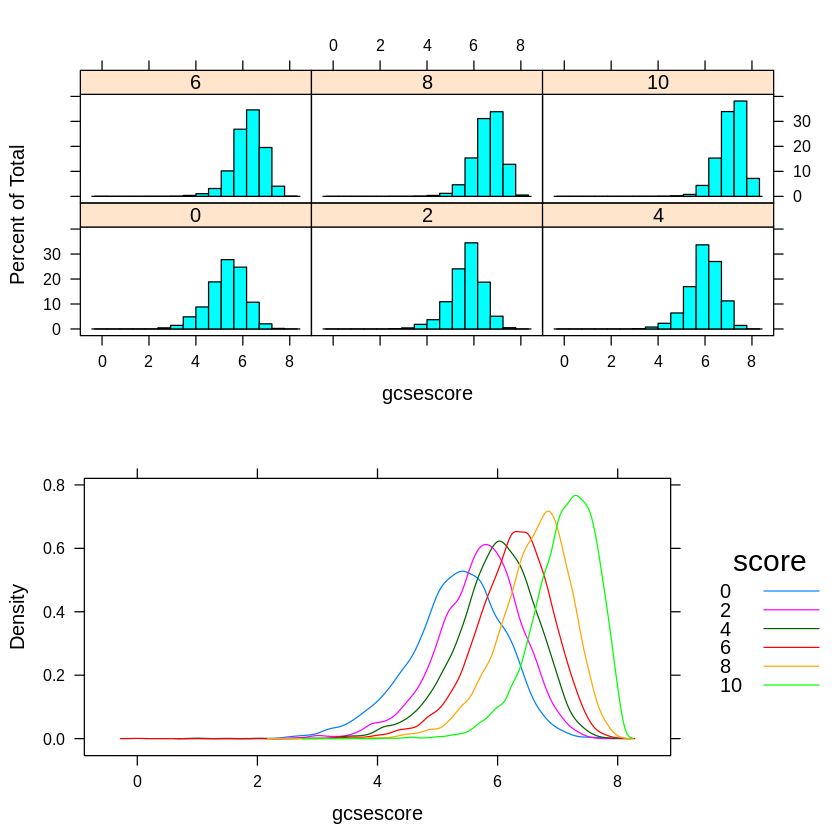

In [10]:
plot(tp1, split = c(1, 1, 1, 2))
plot(tp2, split = c(1, 2, 1, 2), newpage = FALSE)

## HIGH-LEVEL FUNCTIONS IN LATTICE

| **FUNCTION** | **DEFAULT DISPLAY** |
| ------------ | ------------------- |
| histogram() | Histogram |
| densityplot() | Kernel Density Plot |
| qqmath() | Theoretical Quantile Plot |
| qq() | Two-Sample Quantile Plot |
| stripplot() | Stripchart (Comparative 1-D Scatter Plot) |
| bwplot() | Comparative Box-and-Whisker Plots |
| dotplot() | Cleveland Dot Plot |
| barchart() | Bar Plot |
| xyplot() | Scatter Plot |
| splom() | Scatter-Plot Matrix |
| contourplot() | Contour Plot of Surfaces |
| levelplot() | False Color Level Plot of Surfaces |
| wireframe | Three-dimensional Perspective Plot of Surfaces |
| cloud() | Three-dimensional Scatter Plot |
| parallel() | Parallel Coordinates Plot |

Things in common:

1. Each one has formula interface that supports
    multipanel conditioning in a consistent way; and

2. Respond to a number of common arguments.

We will describe these common features (and other
critical design features) next.

# FIGURE FUNCTIONS AS R SCRIPT

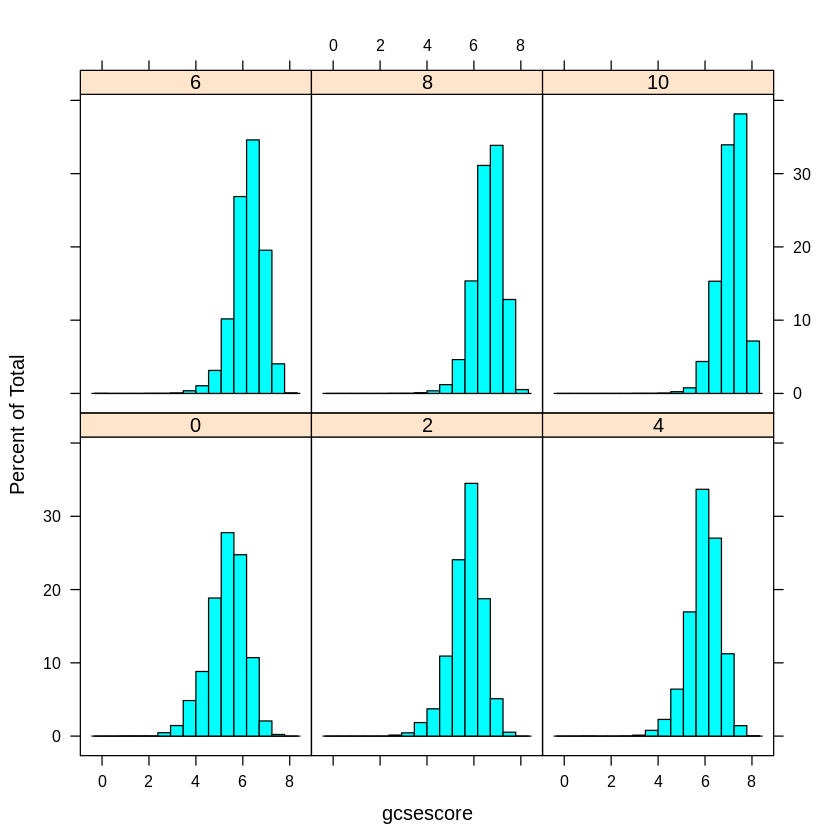

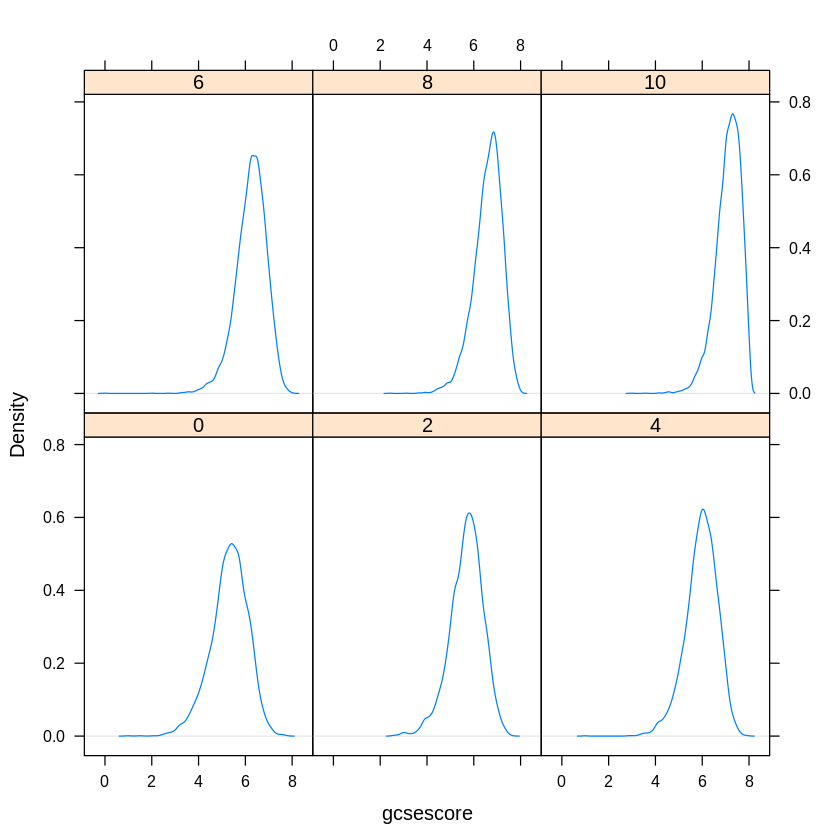

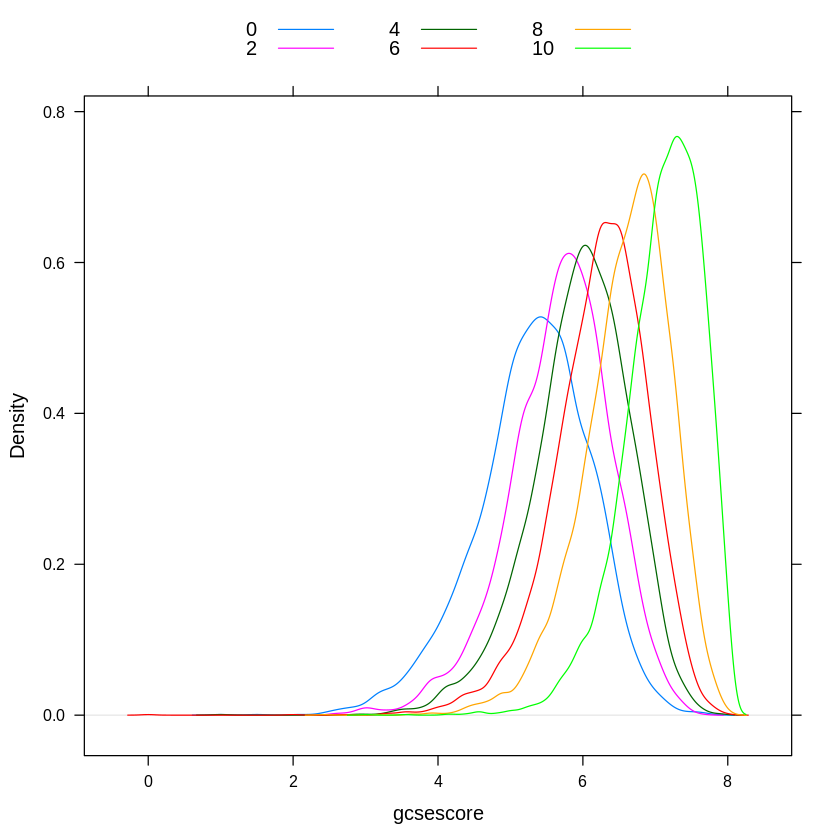

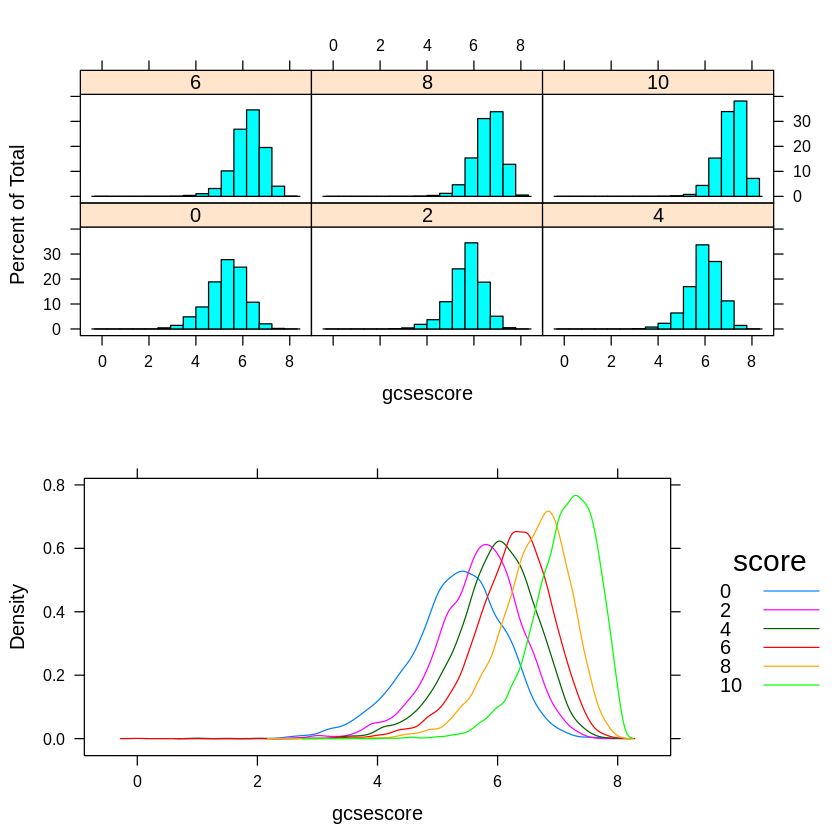

In [11]:
Figure_1.1 <- function()
{
  data(Chem97, package = "mlmRev")
  histogram(~ gcsescore | factor(score), data = Chem97)
}
Figure_1.1()

Figure_1.2 <- function()
{
  data(Chem97, package = "mlmRev")
  densityplot(~ gcsescore | factor(score), data = Chem97, 
              plot.points = FALSE, ref = TRUE)
}
Figure_1.2()

Figure_1.3 <- function()
{
  data(Chem97, package = "mlmRev")
  densityplot(~ gcsescore, data = Chem97, groups = score,
              plot.points = FALSE, ref = TRUE,
              auto.key = list(columns = 3))
}
Figure_1.3()

Figure_1.4 <- function()
{
  data(Chem97, package = "mlmRev")
  tp1 <- histogram(~ gcsescore | factor(score), data = Chem97)
  tp2 <- 
    densityplot(~ gcsescore, data = Chem97, groups = score,
                plot.points = FALSE,
                auto.key = list(space = "right", title = "score"))
  plot(tp1, split = c(1, 1, 1, 2))
  plot(tp2, split = c(1, 2, 1, 2), newpage = FALSE)
}
Figure_1.4()